<a href="https://colab.research.google.com/github/1zpzz/QM2---school-shooting-/blob/main/NOT_SUPER_IMPORTANT_BUT_THERE_IF_NECESSARY_QM2_Differences_in_Differences_for_2013_Mental_Health_Record_Reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Reload the dataset to start fresh
population_df = pd.read_csv('/content/Public v3 (4).csv')

# Ensure the 'Population' column is treated as a string to apply .str.replace()
population_df['Population'] = population_df['Population'].astype(str).str.replace(',', '', regex=False)

# Convert the cleaned 'Population' column to numeric
population_df['Population'] = pd.to_numeric(population_df['Population'], errors='coerce')

# Reload the original dataset to ensure 'Year' and 'State' columns are present
df = pd.read_csv('/content/Public v3 (3).csv') # Reloading the original dataset

# Group shootings data by Year and State
grouped_shootings = df.groupby(['Year', 'State']).size().reset_index(name='Shooting_Count')

# Merge the shootings data with the population data
merged_df = pd.merge(grouped_shootings, population_df, on='State', how='left')

# Calculate shootings per 100,000 people
merged_df['Shootings_per_100k'] = (merged_df['Shooting_Count'] / merged_df['Population']) * 100000

# Pivot the data to have states as rows and years as columns
pivot_table = merged_df.pivot(index='State', columns='Year', values='Shootings_per_100k')

# Replace NaN values with 0
pivot_table = pivot_table.fillna(0)

# Save the final dataset to a CSV file
pivot_table.to_csv('shootings_per_100k_per_year.csv')

# Preview the cleaned dataset
print("\nCleaned Dataset (Preview):")
print(pivot_table.head())


Cleaned Dataset (Preview):
Year     1966.0  1967.0    1968.0  1969.0    1970.0    1971.0    1972.0  \
State                                                                     
AK     0.000000     0.0  0.000000     0.0  0.000000  0.000000  0.000000   
AL     0.000000     0.0  0.000000     0.0  0.000000  0.000000  0.000000   
AR     0.000000     0.0  0.000000     0.0  0.032597  0.000000  0.000000   
AZ     0.000000     0.0  0.000000     0.0  0.000000  0.013457  0.000000   
CA     0.005133     0.0  0.002566     0.0  0.002566  0.002566  0.005133   

Year     1973.0    1974.0    1975.0  ...    2015.0    2016.0    2017.0  \
State                                ...                                 
AK     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
AL     0.019575  0.000000  0.000000  ...  0.019575  0.039151  0.058726   
AR     0.000000  0.032597  0.000000  ...  0.065195  0.032597  0.032597   
AZ     0.000000  0.000000  0.000000  ...  0.013457  0.013457  0.000000   
CA

In [4]:
import matplotlib.pyplot as plt

# Load your cleaned dataset
# Replace 'cleaned_school_shootings.csv' with the path to your cleaned dataset
df = pd.read_csv('shootings_per_100k_per_year.csv')

# Example structure of `df` after cleaning:
# Columns: State_Abbreviation, 1966, 1967, ..., 2024
# Rows: Each state with the number of shootings per year

# Melt the data into long format for easier processing
df_long = df.melt(id_vars='State', var_name='Year', value_name='Shooting_Count')

# Melt the data into long format for easier processing
df_long = df.melt(id_vars='State', var_name='Year', value_name='Shooting_Count')
# Convert 'Year' column to numeric, handling errors by coercing to NaN
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
# Convert 'Year' column to integers, ignoring NaN values
df_long['Year'] = df_long['Year'].astype(int, errors='ignore')

df_long['Year'] = df_long['Year'].astype(int)  # Ensure Year is an integer


<ipython-input-5-f5366910db76>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Post'] = (df_filtered['Year'] >= 2013).astype(int)
<ipython-input-5-f5366910db76>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Interaction'] = df_filtered['Group'].apply(lambda x: 1 if x == 'Treated' else 0) * df_filtered['Post']


                            OLS Regression Results                            
Dep. Variable:     Shootings_per_100k   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     261.8
Date:                Wed, 15 Jan 2025   Prob (F-statistic):          6.28e-150
Time:                        18:03:21   Log-Likelihood:                 5838.6
No. Observations:                2832   AIC:                        -1.167e+04
Df Residuals:                    2828   BIC:                        -1.165e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

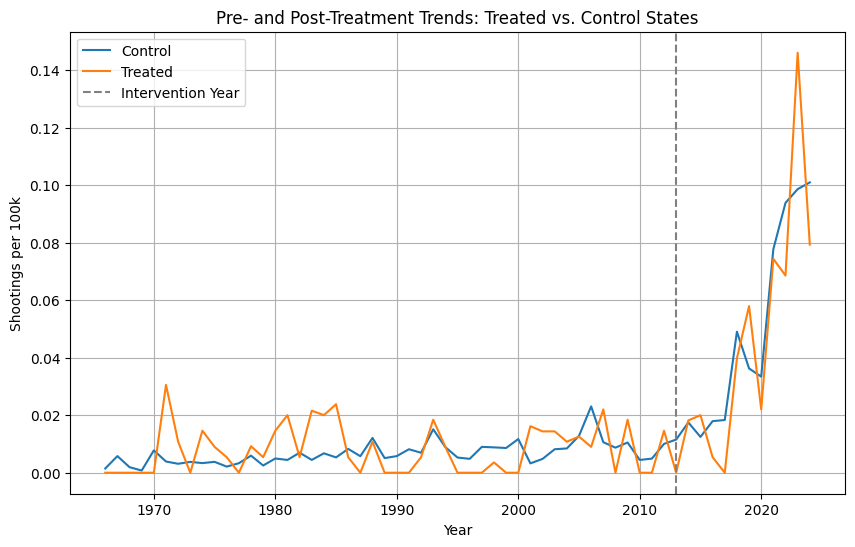

In [5]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Reload the cleaned dataset
pivot_table = pd.read_csv('shootings_per_100k_per_year.csv')

# Melt the pivot table to long format for easier processing
df_long = pivot_table.melt(id_vars=['State'], var_name='Year', value_name='Shootings_per_100k')

# Ensure 'Year' is numeric
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

# Define treated and control states (update based on your treated vs control group selection)
treated_states = ['CT', 'MD', 'NJ']  # Replace with your treated states that have put the
control_states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'DE', 'GA', 'HI', 'IA', 'ID',
    'IL', 'IN', 'KS', 'LA', 'MA', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC',
    'ND', 'NE', 'NH', 'NM', 'NV', 'NY', 'OH', 'RI', 'SD',
    'UT', 'VA', 'VT', 'WI', 'WV', 'WY', 'TN','TX','PA', 'SC', 'FL','OK', 'OR']

# Add a group column: 'Treated' for treated states, 'Control' for control states
df_long['Group'] = df_long['State'].apply(
    lambda x: 'Treated' if x in treated_states else 'Control' if x in control_states else 'Excluded'
)

# Filter only treated and control states
df_filtered = df_long[df_long['Group'] != 'Excluded']

# Add a post-treatment indicator (assuming the intervention was operational in 2013)
df_filtered['Post'] = (df_filtered['Year'] >= 2013).astype(int)

# Interaction term for DiD
df_filtered['Interaction'] = df_filtered['Group'].apply(lambda x: 1 if x == 'Treated' else 0) * df_filtered['Post']

# DiD regression using statsmodels
model = smf.ols('Shootings_per_100k ~ C(Group) * Post', data=df_filtered).fit()

# Print regression results
print(model.summary())

# Plot pre-treatment trends for visual inspection
plt.figure(figsize=(10, 6))

# Group data for plotting
grouped_trends = df_filtered.groupby(['Year', 'Group'])['Shootings_per_100k'].mean().reset_index()

# Plot trends for treated and control groups
for group in grouped_trends['Group'].unique():
    subset = grouped_trends[grouped_trends['Group'] == group]
    plt.plot(subset['Year'], subset['Shootings_per_100k'], label=group)

# Mark the intervention year
plt.axvline(x=2013, color='gray', linestyle='--', label='Intervention Year')

# Customize the plot
plt.title('Pre- and Post-Treatment Trends: Treated vs. Control States')
plt.xlabel('Year')
plt.ylabel('Shootings per 100k')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import statsmodels.formula.api as smf

# Add an interaction term (Post * Treatment) to test the causal effect
df_filtered['Post'] = (df_filtered['Year'] >= 2013).astype(int)
df_filtered['Interaction'] = df_filtered['Post'] * (df_filtered['Group'] == 'Treated').astype(int)

# Fit the Difference-in-Differences regression model
model = smf.ols('Shootings_per_100k ~ Post + (Group == "Treated") + Interaction', data=df_filtered).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Shootings_per_100k   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     261.8
Date:                Wed, 15 Jan 2025   Prob (F-statistic):          6.28e-150
Time:                        18:03:32   Log-Likelihood:                 5838.6
No. Observations:                2832   AIC:                        -1.167e+04
Df Residuals:                    2828   BIC:                        -1.165e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

<ipython-input-6-6faed323b139>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Post'] = (df_filtered['Year'] >= 2013).astype(int)
<ipython-input-6-6faed323b139>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Interaction'] = df_filtered['Post'] * (df_filtered['Group'] == 'Treated').astype(int)


In [9]:
# Define the states and treatment year
treated_states = ['CT', 'MD', 'NJ']  # Replace with your treated states that have put the
control_states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'DE', 'GA', 'HI', 'IA', 'ID',
    'IL', 'IN', 'KS', 'LA', 'MA', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC',
    'ND', 'NE', 'NH', 'NM', 'NV', 'NY', 'OH', 'RI', 'SD',
    'UT', 'VA', 'VT', 'WI', 'WV', 'WY', 'TN','TX','PA', 'SC', 'FL','OK', 'OR']
treatment_year = 2013

# Add a binary column to indicate treatment group
# The 'treatment_states' variable is now accessible within the lambda function because it is defined in the same scope
merged_df['Treatment'] = merged_df['State'].apply(lambda x: 1 if x in treated_states else 0)

# Add a binary column to indicate post-treatment period
merged_df['Post'] = merged_df['Year'].apply(lambda x: 1 if x >= treatment_year else 0)

# Filter relevant states for analysis
analysis_df = merged_df[merged_df['State'].isin(treated_states + control_states)]

# Save the analysis dataset for later use
analysis_df.to_csv('analysis_dataset.csv')

# Preview the dataset
print(analysis_df.head())

     Year State  Shooting_Count  Population  Shootings_per_100k  Treatment  \
0  1966.0    CA               2  38965193.0            0.005133          0   
1  1966.0    FL               1  22610726.0            0.004423          0   
2  1966.0    MN               1   5737915.0            0.017428          0   
3  1966.0    NC               1  10835491.0            0.009229          0   
4  1966.0    NY               1  19571216.0            0.005110          0   

   Post  
0     0  
1     0  
2     0  
3     0  
4     0  


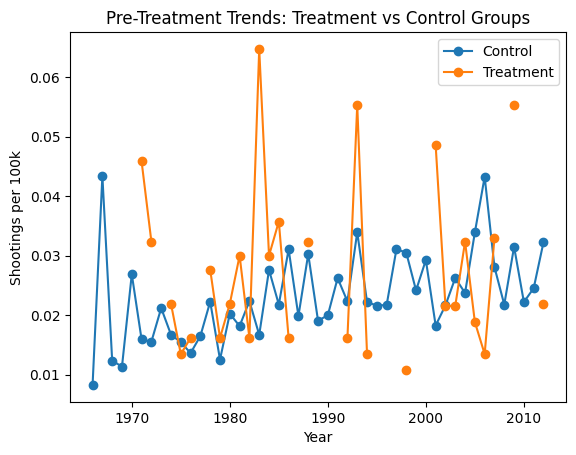

                            OLS Regression Results                            
Dep. Variable:     Shootings_per_100k   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.673
Date:                Wed, 15 Jan 2025   Prob (F-statistic):            0.00308
Time:                        18:04:56   Log-Likelihood:                 1398.0
No. Observations:                 620   AIC:                            -2788.
Df Residuals:                     616   BIC:                            -2770.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

<ipython-input-10-a6e3e788e8f9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_treatment_data['Year_Treatment_Interaction'] = pre_treatment_data['Year'] * pre_treatment_data['Treatment']


In [10]:
import matplotlib.pyplot as plt

# Calculate mean shootings per 100k for treatment and control groups
pre_trends = analysis_df[analysis_df['Year'] < treatment_year]
group_trends = pre_trends.groupby(['Year', 'Treatment'])['Shootings_per_100k'].mean().unstack()

# Plot the trends
group_trends.plot(title='Pre-Treatment Trends: Treatment vs Control Groups', marker='o')
plt.xlabel('Year')
plt.ylabel('Shootings per 100k')
plt.legend(['Control', 'Treatment'])
plt.show()

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Subset data for pre-treatment period
pre_treatment_data = analysis_df[analysis_df['Year'] < treatment_year]

# Add an interaction term for Year and Treatment
pre_treatment_data['Year_Treatment_Interaction'] = pre_treatment_data['Year'] * pre_treatment_data['Treatment']

# Run the regression to check parallel trends
model = smf.ols(
    formula='Shootings_per_100k ~ Year + Treatment + Year_Treatment_Interaction',
    data=pre_treatment_data
).fit()

# Display results
print(model.summary())

